In [119]:
import pandas as pd

In [120]:
df = pd.read_csv("car_purchasing.csv", encoding='latin-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [121]:
df.shape

(500, 9)

In [122]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [123]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [124]:
df2 = df.drop(['customer name','customer e-mail'],axis='columns')
df2.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## EDA

In [125]:
import matplotlib.pyplot as plt

In [126]:
import seaborn as sns

In [127]:
# CONVERTING AGE TO INT
df2['age'] = df2['age'].apply(lambda x: int(x))
df2.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [128]:
# lets see which country have heighest amount
df2[df2['car purchase amount']==80000]

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
315,Namibia,1,55,83333.81054,9874.075327,1000000.0,80000.0


In [129]:
# checking if all namibians have high amounts or is it just 1 person, found that it really is just 1 person
df2[df2['country']=='Namibia']

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
27,Namibia,0,55,61388.62709,14270.007310,341691.9337,49091.97185
100,Namibia,1,52,61858.19077,5189.083564,706977.0530,57441.44414
315,Namibia,1,55,83333.81054,9874.075327,1000000.0000,80000.00000
443,Namibia,0,42,65605.41798,13629.110400,297540.8814,38901.60925


In [130]:
# which country has lowest amount
df2[df2['car purchase amount']==9000]

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
453,Norfolk Island,0,25,45092.74073,11380.09288,158758.3577,9000.0


In [131]:
# lets see which countries have heighest amount
df2.groupby("country")["car purchase amount"].sum().sort_values(ascending=False)

country
Israel               295273.97524
Iraq                 248155.14736
Saint Barthélemy     247988.78204
Algeria              238760.34165
Equatorial Guinea    235561.95293
                         ...     
Saudi Arabia          27586.71854
Honduras              26599.90843
Cameroon              25971.95673
American Samoa        24221.99937
Montenegro            22599.45863
Name: car purchase amount, Length: 211, dtype: float64

In [132]:
st = df2['age'].std()
mean = df2['age'].mean()

In [133]:
upper =  mean + (3*st)
lower  =  mean - (3*st) 
upper,lower

(69.73995606480578, 21.80804393519422)

In [134]:
df2[(df2['age']>upper) | (df2['age']<lower)]

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
194,Haiti,0,70,52323.24480,12438.85648,346555.1716,56229.41270
444,Congo (Brazzaville),1,20,70467.29492,100.00000,494606.6334,28645.39425


In [135]:
df2 = df2[(df2['age']<upper) & (df2['age']>lower)]
df2.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [136]:
# 85% of people are below age of 59
df2['age'].quantile(0.95)


59.0

## visualizations and corr

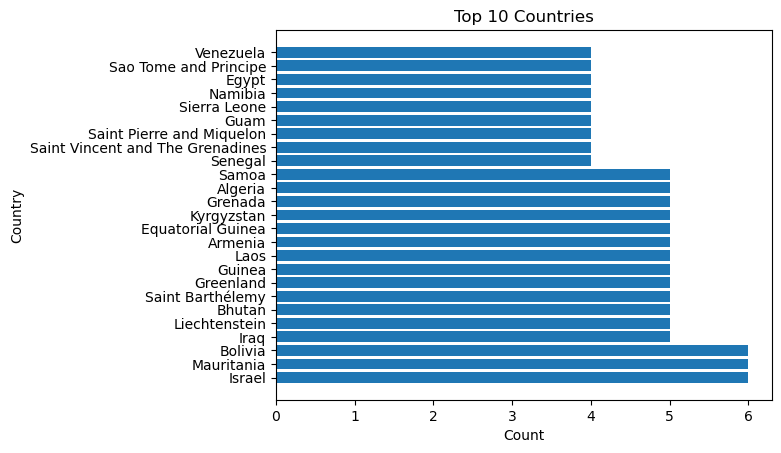

In [137]:

top_n = df2['country'].value_counts().head(25)  

plt.barh(top_n.index, top_n.values)
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 10 Countries")
plt.show()


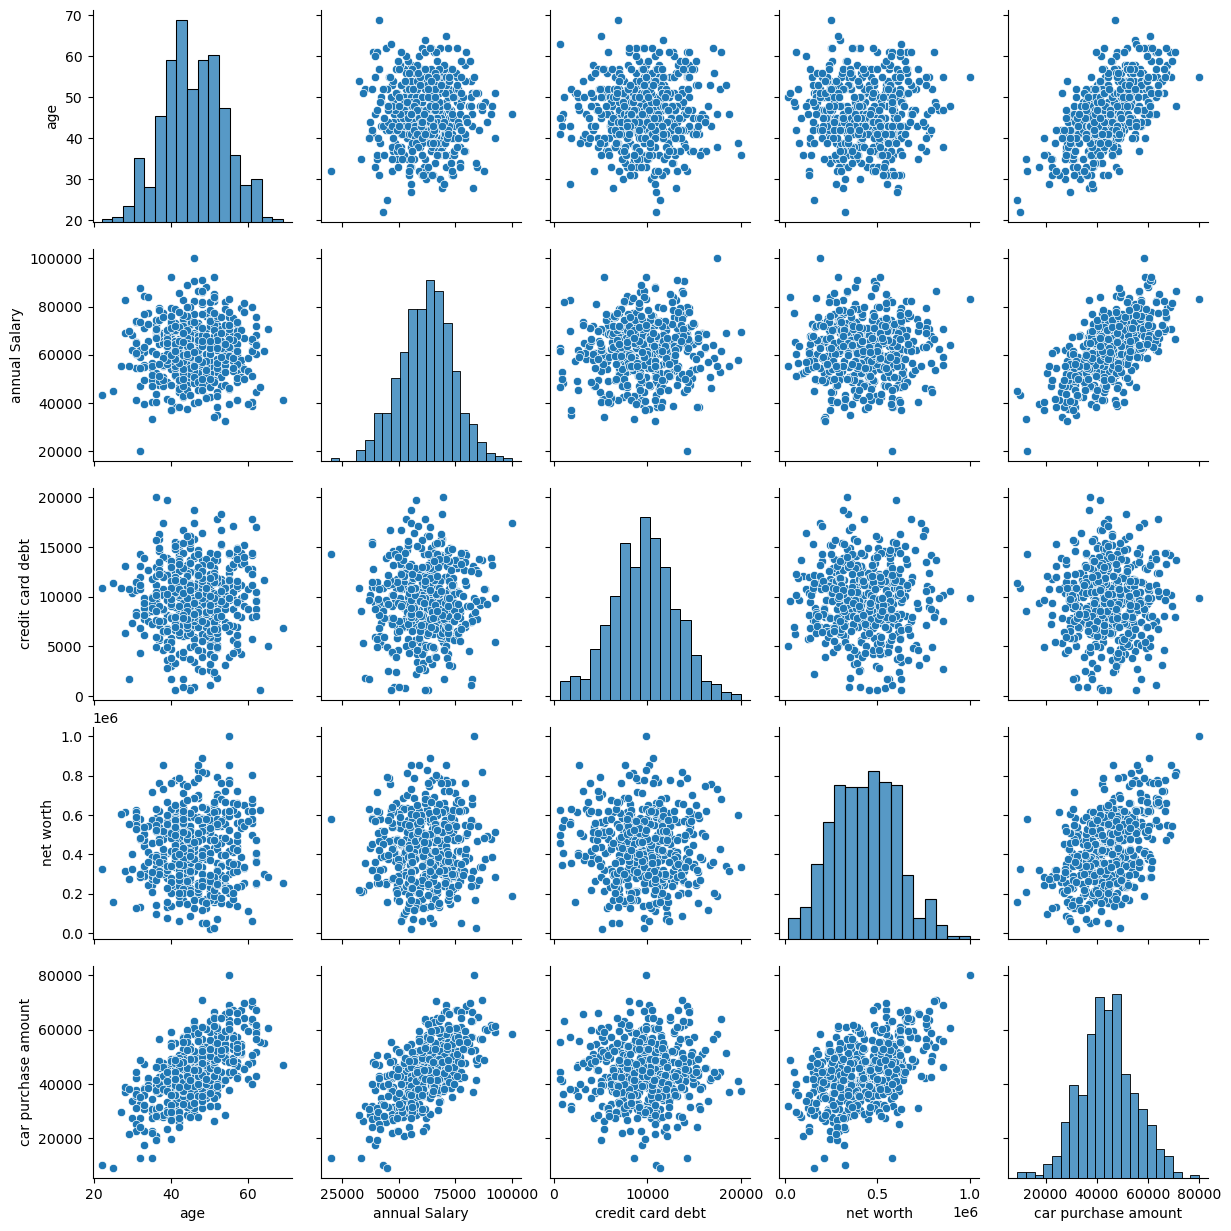

In [138]:
sns.pairplot(data=df2,vars=['age','annual Salary','credit card debt','net worth','car purchase amount'])

In [139]:
numeric = df2.drop(['gender','country'],axis='columns')
mat = numeric.corr()
mat

,age,annual Salary,credit card debt,net worth,car purchase amount
age,1.000000,0.008075,0.015032,0.026001,0.629627
annual Salary,0.008075,1.000000,0.055369,0.013447,0.624642
credit card debt,0.015032,0.055369,1.000000,-0.046996,0.019399
net worth,0.026001,0.013447,-0.046996,1.000000,0.492557
car purchase amount,0.629627,0.624642,0.019399,0.492557,1.000000


<Axes: >

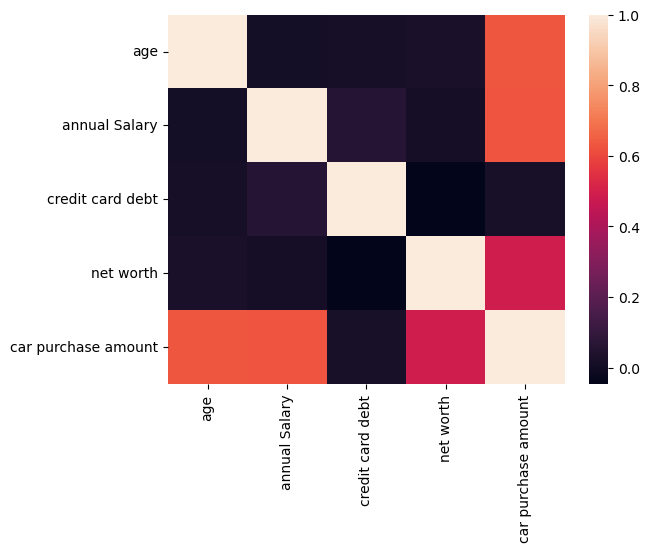

In [140]:
sns.heatmap(mat)

## car purchase amount depends on age,annual salary and net worth

## trying anova for relation between country and car purchasing amount

In [141]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.anova as anova

# Assuming 'df2' is your DataFrame
model = ols('Q("car purchase amount") ~ country', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                sum_sq     df         F    PR(>F)
country   2.660204e+10  210.0  1.175591  0.102109
Residual  3.092584e+10  287.0       NaN       NaN


## since p value is greater than 0.05, we can say that country has no significance on purhasing amount

In [142]:
gend_counts = df2.groupby("gender")['car purchase amount'].sum()

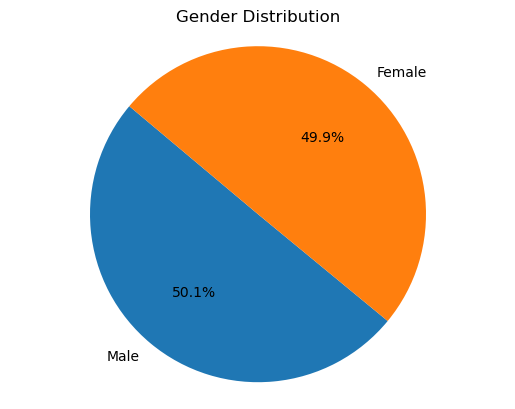

In [143]:
gender_counts = gend_counts.values
labels = ['Male', 'Female']

# Create a pie chart
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140)

# Set aspect ratio to be equal so that the pie is a circle
plt.axis('equal')

# Add a title
plt.title("Gender Distribution")

# Show the chart
plt.show()


In [144]:
X = df2.drop(['car purchase amount','country','gender','credit card debt'],axis="columns")
X

,age,annual Salary,net worth
0,41,62812.09301,238961.2505
1,40,66646.89292,530973.9078
2,43,53798.55112,638467.1773
3,58,79370.03798,548599.0524
4,57,59729.15130,560304.0671
...,...,...,...
495,41,71942.40291,541670.1016
496,37,56039.49793,360419.0988
497,53,68888.77805,764531.3203
498,59,49811.99062,337826.6382


In [145]:
y= df2['car purchase amount']
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 498, dtype: float64

In [146]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [147]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()

In [148]:
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9995096920959308

In [149]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2 , random_state = 0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.99949178, 0.9994134 , 0.99944335, 0.99943041, 0.99961733])

In [151]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model(X, y):
    algos = {
        'linear regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming you have X and y defined
find_best_model(X, y)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear regression,0.999479,{'fit_intercept': True}
1,Lasso,0.999479,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision tree,0.870942,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [155]:
lr_clf.predict([[25,50000,95000]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10199.05270924])